In [39]:
%matplotlib inline
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from onezone import radiation as rad

E_hi  = (13.6 * u.eV).to(u.erg)
E_hei = (24.5874 * u.eV).to(u.erg)
E_heii = (55.51776* u.eV).to(u.erg)
         
T  = np.linspace(10000.0, 70000.0, 4000.0)

In [40]:
hi_crs = np.zeros(np.size(T))
hei_crs = np.zeros(np.size(T))
heii_crs = np.zeros(np.size(T))

for i in np.arange(np.size(T)):

    hi_crs[i]  = (rad.average_energy(E_hi.value, T[i])*u.erg).to(u.eV).value
    hei_crs[i] = (rad.average_energy(E_hei.value, T[i])*u.erg).to(u.eV).value
    heii_crs[i] = (rad.average_energy(E_heii.value, T[i])*u.erg).to(u.eV).value

In [41]:
hi_data = np.genfromtxt("data/ostar2002_sed/ostar2002_E_avg_hi_all_models.dat")
hei_data = np.genfromtxt("data/ostar2002_sed/ostar2002_E_avg_hei_all_models.dat")
heii_data = np.genfromtxt("data/ostar2002_sed/ostar2002_E_avg_heii_all_models.dat")

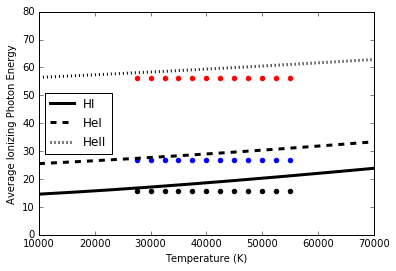

In [42]:
plt.plot(T, hi_crs, color = 'black', ls = '-', label = 'HI', lw = 3)
plt.plot(T, hei_crs, color = 'black', ls = '--', label = 'HeI', lw = 3)
plt.plot(T, heii_crs, color = 'black', ls = ':', label = 'HeII', lw = 3)

plt.ylabel('Average Ionizing Photon Energy')
plt.xlabel('Temperature (K)')
plt.legend(loc='best')
plt.xlim(np.min(T), np.max(T))
plt.ylim(0.0, 80.0)

for tval in np.arange(27500.0, 55001.0, 2500.0):
    selection = hi_data[:,0] == tval
    data = hi_data[selection]
    
    E_avg = 0.0
    counter = 0.0
    for i in np.arange(9):
        
        E_avg += np.average(hi_data[i][2:])

        if np.average(hi_data[i][2:]) > 10.0:
            counter += 1.0
        
    E_avg = E_avg / counter
    
    plt.scatter(tval, E_avg, color = 'black')
    
for tval in np.arange(27500.0, 55001.0, 2500.0):
    selection = hei_data[:,0] == tval
    data = hei_data[selection]
    
    E_avg = 0.0
    counter = 0.0
    for i in np.arange(9):
        
        E_avg += np.average(hei_data[i][2:])

        if np.average(hei_data[i][2:]) > 10.0:
            counter += 1.0
        
    E_avg = E_avg / counter
    
    plt.scatter(tval, E_avg, color = 'blue')
    
for tval in np.arange(27500.0, 55001.0, 2500.0):
    selection = heii_data[:,0] == tval
    data = hei_data[selection]
    
    E_avg = 0.0
    counter = 0.0
    for i in np.arange(9):
        
        E_avg += np.average(heii_data[i][2:])

        if np.average(heii_data[i][2:]) > 10.0:
            counter += 1.0
        
    E_avg = E_avg / counter
    
    plt.scatter(tval, E_avg, color = 'red')
    

In [30]:
np.average(hi_data[3][2:])


15.691590000000001